In [80]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Data Loading

In [144]:
COIN_NAME = "ethereum"
HORIZON = "1h"   #change this to train each model

BASE_DIR = "/Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025"

SEQ_PATH = f"{BASE_DIR}/Milestone_1/data/sequences/{COIN_NAME}/{HORIZON}/"
MODEL_SAVE_PATH = f"{BASE_DIR}/Milestone_2/models/{COIN_NAME}/{HORIZON}/"
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

X_train = np.load(DATA_PATH + "X_train.npy")
y_train = np.load(DATA_PATH + "y_train.npy")
X_val   = np.load(DATA_PATH + "X_val.npy")
y_val   = np.load(DATA_PATH + "y_val.npy")
X_test  = np.load(DATA_PATH + "X_test.npy")
y_test  = np.load(DATA_PATH + "y_test.npy")


print("Loaded shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Loaded shapes:
X_train: (30631, 48, 11)
y_train: (30631,)
X_val: (6525, 48, 11)
y_val: (6525,)
X_test: (6527, 48, 11)
y_test: (6527,)


# Modle Building

In [145]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(16, activation="relu"),
    Dense(1)  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=['mae']
)

model.summary()

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 48, 64)         │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,417 (126.63 KB)

 Trainable params: 32,417 (126.63 KB)

 Non-trainable params: 0 (0.00 B)

# Call Backs

In [146]:
checkpoint = ModelCheckpoint(
    f"{MODEL_SAVE_PATH}/best_lstm_{COIN_NAME}_{HORIZON}.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train

In [147]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0213 - mae: 0.1024
Epoch 1: val_loss improved from None to 0.12147, saving model to /Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025/Milestone_2/models/ethereum/1h//best_lstm_ethereum_1h.keras
479/479 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.0147 - mae: 0.0877 - val_loss: 0.1215 - val_mae: 0.2402
Epoch 2/100
478/479 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0055 - mae: 0.0562
Epoch 2: val_loss improved from 0.12147 to 0.11927, saving model to /Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025/Milestone_2/models/ethereum/1h//best_lstm_ethereum_1h.keras
479/479 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0049 - mae: 0.0525 - val_loss: 0.1193 - val_mae: 0.2335
Epoch 3/100
478/479 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0041 - mae: 0.0468
Epoch 3: val_loss improved from 0.11927 to 0.09735, saving model

# Visualization

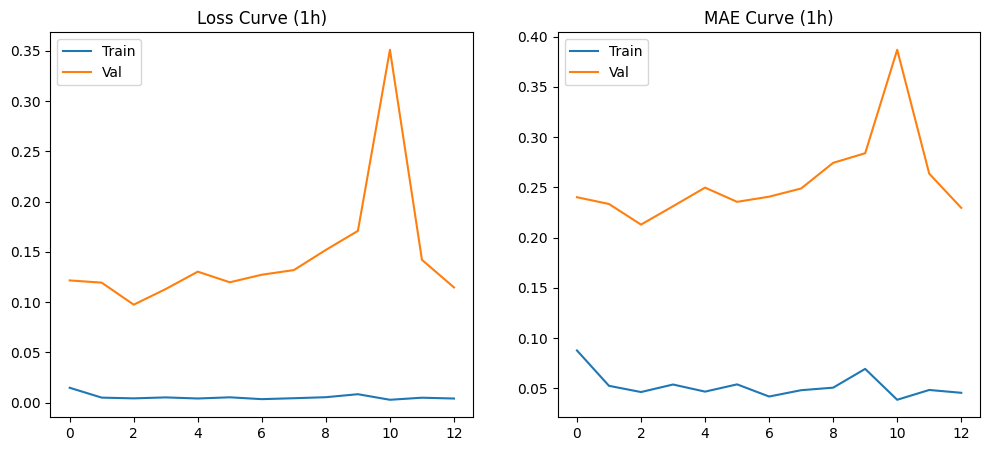

In [148]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title(f"Loss Curve ({HORIZON})")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["mae"], label="Train")
plt.plot(history.history["val_mae"], label="Val")
plt.title(f"MAE Curve ({HORIZON})")
plt.legend()
plt.show()

204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


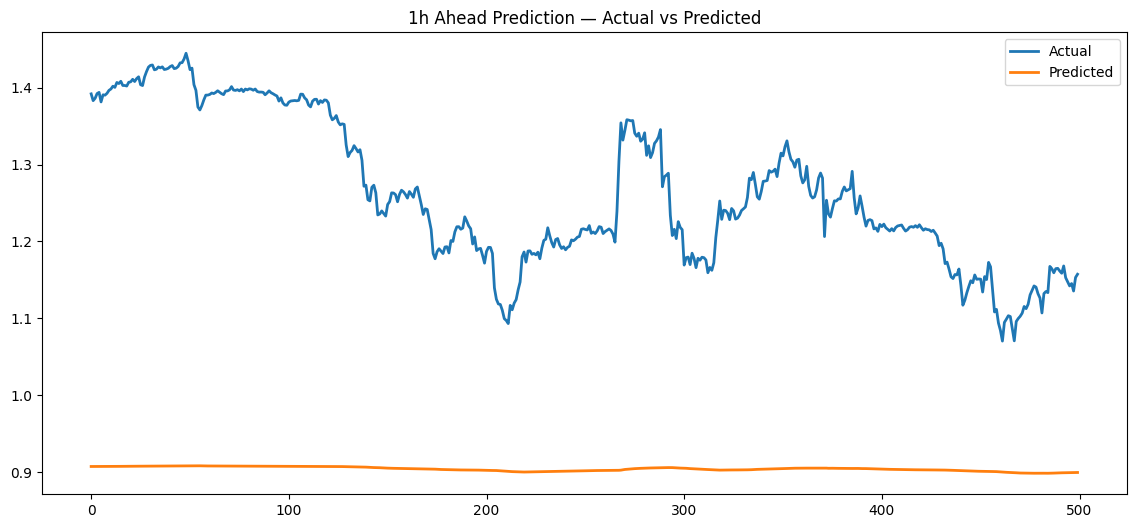

In [149]:
preds = model.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(y_test[:500], label="Actual", linewidth=2)
plt.plot(preds[:500], label="Predicted", linewidth=2)
plt.title(f"{HORIZON} Ahead Prediction — Actual vs Predicted")
plt.legend()
plt.show()

# Evaluation

In [150]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("\n======= TEST PERFORMANCE =======")
print("MSE :", test_loss)
print("MAE :", test_mae)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4241 - mae: 0.6180

======= TEST PERFORMANCE =======
MSE : 0.42406946420669556
MAE : 0.6180347800254822


# Comparison with Xgboost

Persistence baseline → MAE: 1.5213, RMSE: 1.5359, MAPE%: 99.57, R2: -52.7051
LSTM model → MAE: 0.6180, RMSE: 0.6512, MAPE%: 39.20, R2: -8.6549
[0]	validation_0-rmse:0.72359
[50]	validation_0-rmse:0.36375
[100]	validation_0-rmse:0.30659
[150]	validation_0-rmse:0.29525
[200]	validation_0-rmse:0.29249
[250]	validation_0-rmse:0.29167
[299]	validation_0-rmse:0.29157
XGBoost (flattened-window) → MAE: 0.5931, RMSE: 0.6293, MAPE%: 37.52, R2: -8.0158


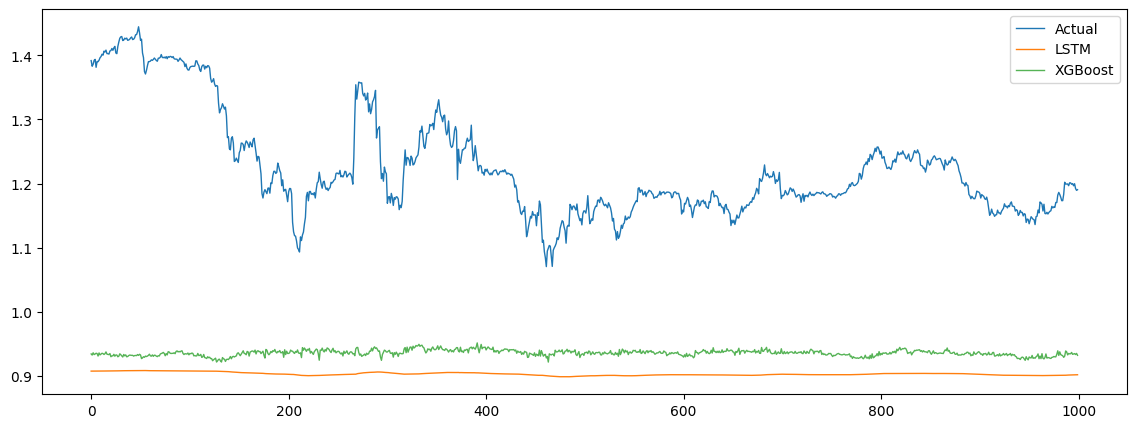

In [151]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt


feature_cols = [
    "open","high","low","close","volume",
    "return_1h","volatility_24h",
    "ma_24","ma_168","ma_ratio",
    "vol_change","missing_flag"
]

# assume you have X_train, X_val, X_test, y_train, y_val, y_test and preds (unscaled real prices)
def print_metrics(y, yhat, label="Model"):
    mae  = mean_absolute_error(y, yhat)
    mse  = mean_squared_error(y, yhat)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y - yhat) / (y + 1e-9))) * 100
    r2   = r2_score(y, yhat)

    print(f"{label} → MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE%: {mape:.2f}, R2: {r2:.4f}")

# baseline: persistence (last close in sequence)
baseline_test = X_test[:, -1, feature_cols.index("close")]
print_metrics(y_test, baseline_test, "Persistence baseline")
print_metrics(y_test, preds, "LSTM model")

# Quick XGBoost on flattened sequences
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat   = X_val.reshape(X_val.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.03, max_depth=6, tree_method='hist')
xgb_model.fit(
    X_train_flat, y_train,
    eval_set=[(X_val_flat, y_val)],
    verbose=50
)
pred_xgb = xgb_model.predict(X_test_flat)

print_metrics(y_test, pred_xgb, "XGBoost (flattened-window)")

# Plot a segment
n = 1000
plt.figure(figsize=(14,5))
plt.plot(y_test[:n], label='Actual', linewidth=1)
plt.plot(preds[:n], label='LSTM', linewidth=1)
plt.plot(pred_xgb[:n], label='XGBoost', linewidth=1, alpha=0.8)
plt.legend(); plt.show()

# Saving Model

In [152]:
final_path = f"{MODEL_SAVE_PATH}/final_lstm_{COIN_NAME}_{HORIZON}.keras"
model.save(final_path)

print("\nModel saved successfully at:")
print(final_path)
print("=========================================")


Model saved successfully at:
/Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025/Milestone_2/models/ethereum/1h//final_lstm_ethereum_1h.keras
